In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

See [Google Cloud Marketplace](https://console.cloud.google.com/marketplace/product/city-of-new-york/nyc-311) for terms of use of the dataset featured in this notebook.

# Working with Pandas Using the Vertex AI Extensions Code Interpreter Extension


<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/notebook_template.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fnotebook_template.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/notebook_template.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/notebook_template.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

| | |
|----------|-------------|
| Author(s)   | Michael W. Sherman |
| Reviewers(s) | YOU |
| Last updated | 2024 03 28: Initial examples |
| | 2024 04 07: Complete draft |

# Overview

This notebook shows how to use the [Vertex AI Extensions](https://cloud.google.com/vertex-ai/generative-ai/docs/extensions/overview) Google-provided [Code Interpreter Extension](https://console.cloud.google.com/vertex-ai/generative-ai/docs/extensions/google-extensions.md#google_code_interpreter_extension) with [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) DataFrame.

When your datasets is small, you can send the entire dataset to Code Interpreter by attaching a file. But what if your dataset is too large?

One workaround is to send Code Interpreter relevant information about your dataset and then ask it to generate pandas code. Pandas DataFrames are only limited in size by the memory of your working environment, and [other frameworks](https://cloud.google.com/python/docs/reference/bigframes/latest) that support pandas code let you work with even larger datasets.

In this notebook you will work with a real-world dataset 10s of megabytes in size and use the Vertex AI Extensions Code Interpreter Extension to:
- Create a pandas dataframe.
- Identify and set column types.
- Visualize and analyze the dataset.
- Perform some data manipulation operations.
- Save the data.

**If you're already familiar with Google Cloud and the Vertex Extensions Code Interpreter Extension**, you can skip reading between here and the "All Your Cool Notebook Stuff Here" section, but make sure to run the code cells.

## Vertex AI Extensions

[Vertex AI Extensions](https://cloud.google.com/vertex-ai/generative-ai/docs/extensions/overview) is a platform for creating and managing extensions that connect large language models to external systems via APIs. These external systems can provide LLMs with real-time data and perform data processing actions on their behalf. You can use pre-built or third-party extensions in Vertex AI Extensions.

## Vertex AI Extensions Code Interpreter Extension

The [Code Interpreter](https://console.cloud.google.com/vertex-ai/generative-ai/docs/extensions/google-extensions.md#google_code_interpreter_extension) extension provides access to a Python interpreter with a sandboxed, secure execution environment that can be used with any model in the Vertex AI Model Garden. This extension can generate and execute code in response to a user query or workflow. It allows the user or LLM agent to perform various tasks such as data analysis and visualization on new or existing data files.

You can use the Code Interpreter extension to:

* Generate and execute code.
* Perform a wide variety of mathematical calculations.
* Sort, filter, select the top results, and otherwise analyze data (including data acquired from other tools and APIs).
* Create visualizations, plot charts, draw graphs, shapes, print results, etc.

## Using this Notebook

Colab is recommended for running this notebook, but it can run in any iPython environment where you can connect to Google Cloud, install pip packages, etc.

If you're running outside of Colab, depending on your environment you may need to install pip packages (like pandas) that are included in the Colab environment by default but are not part of the Python Standard Library. You'll also notice some comments in code cells that look like #@something -- these may contain informative text

This tutorial uses the following Google Cloud services and resources:

* Vertex AI Extensions
* BigQuery

This notebook has been tested in the following environment:

* Python version = 3.10.12
* [pandas](https://pypi.org/project/pandas/2.0.3/) version = 2.0.3
* [google-cloud-aiplatform](https://pypi.org/project/google-cloud-aiplatform/) version = 1.47.0

## Useful Tips

1. This notebook uses Generative AI cababilities. Re-running a cell that uses Generative AI capabilities may produce similar but not identical results.
2. Because of #1, it is possible that an output from Code Interpreter producess errors. If that happens re-run the cell that produced the coding error. The different generated code will likely be bug free. The `run_code_interpreter` method below helps automate this.
3. The use of Extensions and other Generative AI capabilities is subject to service quotas. Running the notebook using "Run All" may exceed  your Queries per minute (QPM) limitations. Run the notebook manually and if you get a quota error pause for up to 1 minute before retrying that cell. Code Interpreter uses Gemini on the backend and is subject to the Gemini quotas, [view your Gemini quotas here](https://console.cloud.google.com/iam-admin/quotas?pageState=(%22allQuotasTable%22:(%22f%22:%22%255B%257B_22k_22_3A_22_22_2C_22t_22_3A10_2C_22v_22_3A_22_5C_22base_model_5C_22_22%257D_2C%257B_22k_22_3A_22_22_2C_22t_22_3A10_2C_22v_22_3A_22_5C_22gemini_5C_22_22%257D%255D%22%29%29&e=13802955&mods=logs_tg_staging).


# Getting Started

The following steps are necessary to run this notebook, no matter what notebook environment you're using.

If you're entirely new to Google Cloud, [get started here](https://cloud.google.com/docs/get-started).

## Google Cloud Project Setup

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs.
1. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project).
1. [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).
1. [Enable the BigQuery API](https://console.cloud.google.com/apis/library/bigquery.googleapis.com).

## Google Cloud Permissions
Make sure you have been [granted the following roles](https://cloud.google.com/iam/docs/granting-changing-revoking-access) for the GCP project you'll access from this notebook:
* [`roles/aiplatform.user`](https://cloud.google.com/vertex-ai/docs/general/access-control#aiplatform.user)
* [`roles/bigquery.jobUser`](https://cloud.google.com/bigquery/docs/access-control#bigquery.jobUser) or [`roles/bigquery.User`](https://cloud.google.com/bigquery/docs/access-control#bigquery.user)

## Outside of Colab: Install the Google Cloud CLI

If you are running this notebook in your own environment, you need to install the [Cloud SDK](https://cloud.google.com/sdk) (aka `gcloud`).

## Install the Google Cloud Vertex AI Python SDK

If you already have the Google Cloud Vertex AI Python SDK installed, upgrade to the latest version.

In [2]:
!pip install google-cloud-aiplatform --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-aiplatform
    Found existing installation: google-cloud-aiplatform 1.46.0
    Uninstalling google-cloud-aiplatform-1.46.0:
      Successfully uninstalled google-cloud-aiplatform-1.46.0


### Restart runtime

You may need to restart your notebook runtime to use the Vertex AI SDK. You can do this by running the cell below, which restarts the current kernel.

You may see the restart reported as a crash, but it is working as-intended -- you are merely restarting the runtime.

The restart might take a minute or longer. After its restarted, continue to the next step.

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


If you're using Colab, as long the notebook runtime isn't deleted (even if it restarts) you don't need to re-run the previous cell.

If you're running this notebook in your own environment you shouldn't need to run the previous cell again unless you delete your IPython kernel.

## Authenticate

If you're using Colab, run the code in the next cell. Follow the popups and authenticate with an account that has access to your Google Cloud [project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#identifying_projects).

If you're running this notebook somewhere besides Colab, make sure your environment has the right Google Cloud access. If that's a new concept to you, consider looking into [Application Default Credentials for your local environment](https://cloud.google.com/docs/authentication/provide-credentials-adc#local-dev) and [initializing the Google Cloud CLI](https://cloud.google.com/docs/authentication/gcloud). More authentication options are discussed [here](https://cloud.google.com/docs/authentication).

In [3]:
# Colab authentication.
import sys

if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()
    print('Authenticated')

Authenticated


# Initialize the Google Cloud Vertex AI Python SDK

Start here if your Notebook kernel restarts (but isn't deleted), though if it's been a few hours you may need to run the Authentication steps above again.

To initialize the SDK, you need to set your Google Cloud project ID and region.

If you don't know your project  ID, try the [Google Cloud CLI](https://cloud.google.com/sdk) commands [`gcloud config list`](https://cloud.google.com/sdk/gcloud/reference/config/list) or [`gcloud projects list`](https://cloud.google.com/sdk/gcloud/reference/projects/list). See the support page [Locate the project ID](https://support.google.com/googleapi/answer/7014113) for more information.


### Set Your Project ID



In [4]:
PROJECT_ID = "YOUR_PROJECT_ID_ HERE"  # @param {type:"string"}

# Set the project for CLI commands.
!gcloud config set project {PROJECT_ID}

Updated property [core/project].


### Set the Region

You can also change the `REGION` variable used by Vertex AI. Learn more about [Vertex AI regions](https://cloud.google.com/vertex-ai/docs/general/locations).

In [5]:
REGION = "us-central1"  # @param {type: "string"}

### Import the Vertex AI Python SDK

In [6]:
import vertexai
from vertexai.preview import extensions

vertexai.init(
    project=PROJECT_ID,
    location=REGION
)

# Import Additional Libraries

In [7]:
import pandas as pd
pd.set_option('display.max_columns', None)
import pprint  # For better formatting when printing raw Code Intepreter output.

# Setup and Test the Code Interpreter Extension

Code Interpreter is provided by Google, so you can load it directly.

In [8]:
extension_code_interpreter = extensions.Extension.from_hub("code_interpreter")
extension_code_interpreter

INFO:vertexai.extensions._extensions:Creating Extension
INFO:vertexai.extensions._extensions:Create Extension backing LRO: projects/333698871702/locations/us-central1/extensions/842665711527526400/operations/3712961740917440512
INFO:vertexai.extensions._extensions:Extension created. Resource name: projects/333698871702/locations/us-central1/extensions/842665711527526400
INFO:vertexai.extensions._extensions:To use this Extension in another session:
INFO:vertexai.extensions._extensions:extension = vertexai.preview.extensions.Extension('projects/333698871702/locations/us-central1/extensions/842665711527526400')


resource name: projects/333698871702/locations/us-central1/extensions/842665711527526400

Confirm your Code Interpreter extension is registered:

In [9]:
print("Name:", extension_code_interpreter.gca_resource.name)
print("Display Name:", extension_code_interpreter.gca_resource.display_name)
print("Description:", extension_code_interpreter.gca_resource.description)

Name: projects/333698871702/locations/us-central1/extensions/842665711527526400
Display Name: Code Interpreter
Description: This extension generates and executes code in the specified language


## Test Code Interpreter

To test Code Interpreter, ask it to generate a basic plot from a small dataset. If you're already familiar with Code Interpreter you can skip this section.

In [10]:
QUERY = """
Using the data below, construct a bar chart that includes only the height values with different colors for the bars:

tree_heights_prices = {
  \"Pine\": {\"height\": 100, \"price\": 100},
  \"Oak\": {\"height\": 65, \"price\": 135},
  \"Birch\": {\"height\": 45, \"price\": 80},
  \"Redwood\": {\"height\": 200, \"price\": 200},
  \"Fir\": {\"height\": 180, \"price\": 162},
}

Please include the data in the generated code.
"""

response = extension_code_interpreter.execute(
    operation_id = "generate_and_execute",
    operation_params = {"query": QUERY},
)

print(response)

{'output_files': [{'contents': 'iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAYAAAA10dzkAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAsqElEQVR4nO3de3RU9b2/8feEy3BpZkKAJKSEm6CAXORSY04pJBAIgUIpWIugciuKBjwQq5ycgoK2hqKl1opCWyFaCVi7uCg9shYJTSIQKIRF0ypEQrkWEhCaDIlkCGR+f/hz6piAVpnZmfk+r7VmLWbvneEzbmAe9+w9Y/N4PB4BAADAGGFWDwAAAIDAIgABAAAMQwACAAAYhgAEAAAwDAEIAABgGAIQAADAMAQgAACAYQhAAAAAwxCAAAAAhiEAAQAADEMAAgAAGIYABAAAMAwBCAAAYBgCEAAAwDAEIAAAgGEIQAAAAMMQgAAAAIYhAAEAAAxDAAIAABiGAAQAADAMAQgAAGAYAhAAAMAwBCAAAIBhCEAAAADDEIAAAACGIQABAAAMQwACAAAYhgAEAAAwDAEIAABgGAIQAADAMAQgAACAYQhAAAAAwxCAAAAAhiEAAQAADEMAAgAAGIYABAAAMAwBCAAAYBgCEAAAwDAEIAAAgGEIQAAAAMMQgAAAAIYhAAEAAAxDAAIAABiGAAQAADAMAQgAAGAYAhAAAMAwBCAAAIBhCEAAAADDEIAAAACGIQABAAAMQwACAAAYhgAEAAAwDAEIAABgGAIQAADAMAQgAACAYQhAAAAAwzS1eoBgVldXpzNnzig8PFw2m83qcQAAwJfg8Xh06dIlxcbGKizMzGNhBODXcObMGcXFxVk9BgAA+ApOnTqljh07Wj2GJQjAryE8PFzSJ3+AHA6HxdMAAIAvw+VyKS4uzvs6biIC8Gv49G1fh8NBAAIAEGRMPn3LzDe+

Now, dig deeper into the returned `response` object. `pprint` more clearly shows the generated code:

In [11]:
pprint.pprint(response)

{'execution_error': '',
 'execution_result': '',
 'generated_code': '```python\n'
                   'import matplotlib.pyplot as plt\n'
                   'import pandas as pd\n'
                   '\n'
                   'tree_heights_prices = {\n'
                   '  "Pine": {"height": 100, "price": 100},\n'
                   '  "Oak": {"height": 65, "price": 135},\n'
                   '  "Birch": {"height": 45, "price": 80},\n'
                   '  "Redwood": {"height": 200, "price": 200},\n'
                   '  "Fir": {"height": 180, "price": 162},\n'
                   '}\n'
                   '\n'
                   'tree_heights = '
                   "pd.DataFrame(tree_heights_prices).T['height']\n"
                   '\n'
                   "tree_heights.plot(kind='bar', color=['red', 'blue', "
                   "'green', 'yellow', 'orange'])\n"
                   'plt.show()\n'
                   '```',
 'output_files': [{'contents': 'iVBORw0KGgoAAAANSUhEUgAAAoAAAAHg

You'll notice the `response` object has an `output_files` object that contains files you'll want to extract.

In the next section you'll create some helper functions that make it easier to work with Code Interpreter's `response` object.

# Code Interpreter Helper Functions

These functions are optional when using Code Interpreter but make it easier to inspect Code Interpreter's output, assemble Code Interprer requests, and run generated code.

## `process_response`

`process_response` displays the generated code and any output files, shows the output from code execution, surfaces code execution errors, and saves output files.

**To use this functionality** call `process_response(response)` \
where `response` is the Code Interpreter `response` object.


In [12]:
import base64
import json
import pprint
import pandas
import sys
import IPython
if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO

css_styles = """
<style>
.main_summary {
  font-weight: bold;
  font-size: 14px; color: #4285F4;
  background-color:rgba(221, 221, 221, 0.5); padding:8px;}
.main_summary:hover {background-color: rgba(221, 221, 221, 1);}
details {
  background-color:#fff;
  border: 1px solid #E8EAED;
  padding:0px;
  margin-bottom:2px; }
details img {width:50%}
details > div {padding:10px; }
div#left > details:first-of-type > div {
    overflow:auto;
    max-height:400px; }

div#right > pre {
    overflow:auto;
    max-height:600px;
    background-color: ghostwhite;
    padding: 10px; }
details details > div { overflow: scroll; max-height:400px}
details details {
  background-color:rgba(246, 231, 217, 0.2);
  border: 1px solid #FBBC04;}
details details > summary {
  padding: 8px;
  background-color:rgba(255, 228, 196, 0.6); }
details details > summary:hover { background-color:rgba(255, 228, 196, 0.9); }
div#left {width: 64%; padding:0 1%;  }
div#right {
  border-left: 1px solid silver;
  width: 30%;
  float: right;
  padding:0 1%; }
body {color: #000; background-color: white; padding:10px 10px 40px 10px; }
#main { border: 1px solid #FBBC04; padding:10px 0; display: flow-root; }
h3 {color: #000; }
code  { font-family: monospace; color: #900; padding: 0 2px; font-size: 105%; }
</style>
        """

# Parser to visualise the content of returned files as HTML.
def parse_files_to_html(outputFiles, save_files_locally = True):
    IMAGE_FILE_EXTENSIONS = set(["jpg", "jpeg", "png"])
    file_list = []
    details_tml = """<details><summary>{name}</summary><div>{html_content}</div></details>"""

    if not outputFiles:
      return "No Files generated from the code"
    # Sort output_files so images are displayed before other files such as JSON.
    for output_file in sorted(
        outputFiles,
        key=lambda x: x["name"].split(".")[-1] not in IMAGE_FILE_EXTENSIONS,
    ):
        file_name = output_file.get("name")
        file_contents = base64.b64decode(output_file.get("contents"))
        if save_files_locally:
          open(file_name,"wb").write(file_contents)

        if file_name.split(".")[-1] in IMAGE_FILE_EXTENSIONS:
            # Render Image
            file_html_content = ('<img src="data:image/png;base64, '
                                f'{output_file.get("contents")}" />')
        elif file_name.endswith(".json"):
            # Pretty print JSON
            json_pp = pprint.pformat(
                        json.loads(file_contents.decode()),
                        compact=False,
                        width=160)
            file_html_content =  (f'<span>{json_pp}</span>')
        elif file_name.endswith(".csv"):
            # CSV
            csv_md = pandas.read_csv(
                  StringIO(file_contents.decode())).to_markdown(index=False)
            file_html_content = f'<span>{csv_md}</span>'
        elif file_name.endswith(".pkl"):
            # PKL
            file_html_content = f'<span>Preview N/A</span>'
        else:
            file_html_content = f"<span>{file_contents.decode()}</span>"

        file_list.append({'name': file_name, "html_content": file_html_content})

    buffer_html = [ details_tml.format(**_file) for _file in file_list ]
    return "".join(buffer_html)

# Processing code interpreter response to html visualization.
def process_response(response: dict, save_files_locally = True) -> None:

  result_template = """
  <details open>
    <summary class='main_summary'>{summary}:</summary>
    <div><pre>{content}</pre></div>
  </details>
  """

  result = ""
  code = response.get('generated_code')
  if response.get('execution_error', None):
    result = result_template.format(
        summary="An error occured when executing code",
        content=response.get('execution_error', None))
  else:
    if 'execution_result' in response and response['execution_result']!="":
      result = result_template.format(
          summary="Executed Code Output",
          content=response.get('execution_result'))
    else:
      result = result_template.format(
        summary="Executed Code Output",
        content="Code does not produced printable output")

    result += result_template.format(
      summary="Files Created <u>(Click on filename to view content)</u>",
      content=parse_files_to_html(
          response.get('output_files', []),
          save_files_locally = True))

  display(
      IPython.display.HTML(
        ( f"{css_styles}"
f"""
<div id='main'>
    <div id="right">
      <h3>Generated Code by Code Interpreter</h3>
      <pre><code>{code}</code></pre>
    </div>
    <div id="left">
      <h3>Code Execution Results</h3>
      {result}
    </div>
</div>
"""
        )
      )
  )


## `run_code_interpreter`
`run_code_interpreter` eases calling Code Interpreter by encoding files to base 64 (a Code Interpreter requirement) and submitting the files alongside the instructions. It also automates retries (5 by default) if the generated code doesn't execute or if Code Interpreter fails due to exceeding Gemini (time-based) quotas.

**To use this functionality**  call `run_code_interpreter(instructions, filenames, retry_num)`
where `instructions` is the prompt for Code Interpreter, `filenames` is a list of local files in the working directory to submit to Code Interpreter, and optionally `retry_num` if you want to change the default number of retries from 5.

In [13]:
from time import sleep

def run_code_interpreter(instructions: str,
                         filenames: list[dict] = [],
                         retry_num: int = 5) -> dict['str', 'str']:

  file_arr = [
      {
          "name": filename,
          "contents":  base64.b64encode(open(filename, "rb").read()).decode()
      }
      for filename in filenames
  ]

  attempts = 0
  retry_wait_time = 15
  res = {}
  while attempts <= retry_num:
    attempts += 1
    try:
      res = extension_code_interpreter.execute(
          operation_id = "generate_and_execute",
          operation_params = {
              "query": instructions,
              "files": file_arr
          },
      )
    except Exception as e:  # Exception due to service issue (i.e quotas reached or timeout etc. We want to retry unless attempts already exceted rety_num)
      if attempts > retry_num:
        print('Retries exceeded, raising exception from last attempt.')
        raise e  # Retry attempts exhausted.
      else:
        print(
            f"An error occured {e} \n "
            f"Automatic retry attempt # {attempts}/{retry_num} in"
            f" {retry_wait_time} seconds...")
        sleep(retry_wait_time) # Wait 15 seconds before retry.
        continue

    if not res.get('execution_error', None):
      return res
    elif attempts <= retry_num:
      print(f"The generated code produced an error {res.get('execution_error')}"
            f" -Automatic retry attempt # {attempts}/{retry_num}")

  return res


In [14]:
from time import sleep

def run_code_interpreter2(instructions: str,
                         filenames: list[dict] = [],
                         retry_num: int = 5) -> dict['str', 'str']:

  file_arr = [
      {
          "name": filename,
          "contents":  base64.b64encode(open(filename, "rb").read()).decode()
      }
      for filename in filenames
  ]


  res = {}
  res = extension_code_interpreter.execute(
      operation_id = "generate_and_execute",
      operation_params = {
          "query": instructions,
          "files": file_arr
          },
      )
  return res


## `run_locally`
`run_locally` executes code generated by Code Interpreter.

**To use this functionality**  call `run_locally(response)` with the `response` object returned by Code Interpreter.

Note, while issues with Code Interpreter code are unlikely, to avoid unexpected issues you should always inspect generated code before you run it locally.


In [15]:
def run_locally(response):
  my_code = "\n".join(response['generated_code'].split('\n')[1:-1])
  exec(my_code)


## Using the Helper Functions

To demonstrate the helper functions, write a CSV of data, send the CSV with a prompt to Code Interpreter, examine the response, and run the code locally.

In [16]:
import csv

tree_heights_prices = {
  "Pine": {"height": 100, "price": 100},
  "Oak": {"height": 65, "price": 135},
  "Birch": {"height": 45, "price": 80},
  "Redwood": {"height": 200, "price": 200},
  "Fir": {"height": 180, "price": 162},
}

with open('tree_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['Tree', 'Height', 'Price']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for tree, data in tree_heights_prices.items():
        writer.writerow({'Tree': tree, 'Height': data['height'], 'Price': data['price']})

In [17]:
response = run_code_interpreter("Make a bar chart of the heights of the trees.",
                                ['tree_data.csv'])

In [18]:
process_response(response)

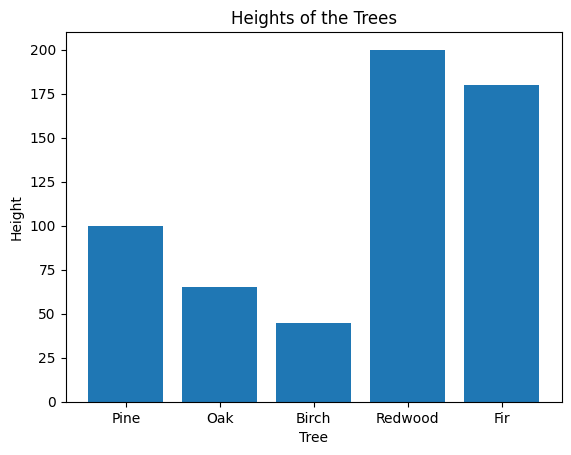

In [19]:
run_locally(response)

# Retrieve the Data

You'll be using the New York City 311 dataset, which contains citizen [complaints and reports](https://portal.311.nyc.gov/report-problems/) of non-emergency issues (e.g., illegal parking, noise, parties, leaking fire hydrants, damaged buildings, broken streetlights, etc.).

In [20]:
from google.cloud import bigquery

client = bigquery.Client(project=PROJECT_ID)

# Perform a query.
QUERY = ("""
  SELECT
    unique_key,
    created_date,
    closed_date,
    agency,
    agency_name,
    complaint_type,
    descriptor,
    location_type,
    incident_zip,
    incident_address,
    street_name,
    cross_street_1,
    cross_street_2,
    intersection_street_1,
    intersection_street_2,
    address_type,
    status,
    resolution_description,
    community_board,
    borough,
    park_facility_name,
    open_data_channel_type,
    taxi_pickup_location,
    bridge_highway_name,
    bridge_highway_direction,
    bridge_highway_segment
  FROM `bigquery-public-data.new_york_311.311_service_requests`
  WHERE rand() < .0015
  """)
query_job = client.query(QUERY)
df_311 = query_job.to_dataframe()

In [21]:
len(df_311)

40703

In [22]:
df_311.to_pickle('311_dataframe.pkl', compression="zip")

# Clean up types

In [23]:
table = client.get_table('bigquery-public-data.new_york_311.311_service_requests')  # Make an API request.
import io
foo = open("schema.json", "w") #io.StringIO("")
client.schema_to_json(table.schema, foo)
#print(foo.getvalue())
foo.close()

In [24]:
response = run_code_interpreter("""
The attached pkl file has a dataframe where some of the column types are wrong.
First, load the pickled dataframe. The pickled dataframe was saved with the compression set to zip.
Use the attached BigQuery schema JSON file to set the columns to a pandas dtype that corresponds to the type of the column in BigQuery.
The JSON is a list of columns, where name is the name of the column and type is the type.
Not all the columns in the schema are columns in the dataframe, don't set the types of columns not in the dataframe.
Columns that are string should be set explicitly to /"string/", not /"str"/.
String columns with fewer than 200 unique values should be set as category types.
Then return a pickle of the dataframe in a file called "311_dataframe_typed.pkl", save the pickle with zip compression.
""",['311_dataframe.pkl', 'schema.json'], retry_num=1)
process_response(response)

The generated code produced an error data type 'TIMESTAMP' not understood -Automatic retry attempt # 1/1


In [25]:
df_311_typed = pd.read_pickle('311_dataframe_typed.pkl', compression='zip')

In [26]:
df_311.dtypes

unique_key                                Int64
created_date                datetime64[us, UTC]
closed_date                 datetime64[us, UTC]
agency                                   object
agency_name                              object
complaint_type                           object
descriptor                               object
location_type                            object
incident_zip                             object
incident_address                         object
street_name                              object
cross_street_1                           object
cross_street_2                           object
intersection_street_1                    object
intersection_street_2                    object
address_type                             object
status                                   object
resolution_description                   object
community_board                          object
borough                                  object
park_facility_name                      

In [27]:
df_311_typed.dtypes

unique_key                                Int64
created_date                datetime64[us, UTC]
closed_date                 datetime64[us, UTC]
agency                                 category
agency_name                            category
complaint_type                   string[python]
descriptor                       string[python]
location_type                          category
incident_zip                     string[python]
incident_address                 string[python]
street_name                      string[python]
cross_street_1                   string[python]
cross_street_2                   string[python]
intersection_street_1            string[python]
intersection_street_2            string[python]
address_type                           category
status                                 category
resolution_description           string[python]
community_board                        category
borough                                category
park_facility_name               string[

In [28]:
df_311_typed

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,status,resolution_description,community_board,borough,park_facility_name,open_data_channel_type,taxi_pickup_location,bridge_highway_name,bridge_highway_direction,bridge_highway_segment
0,19807213,2011-02-10 17:53:27+00:00,2011-02-11 12:36:13+00:00,DFTA,Department for the Aging,Housing - Low Income Senior,N/A,Senior Address,10456,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,ADDRESS,Closed,The Department for the Aging contacted you and...,04 BRONX,BRONX,Unspecified,PHONE,NaN,NaN,NaN,NaN
1,20084523,2011-03-22 13:59:19+00:00,2011-03-24 16:58:28+00:00,DFTA,Department for the Aging,Housing - Low Income Senior,N/A,Senior Address,10457,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,ADDRESS,Closed,The Department for the Aging contacted you and...,04 BRONX,BRONX,Unspecified,PHONE,NaN,NaN,NaN,NaN
2,20939553,2011-07-30 14:56:55+00:00,2011-08-01 12:57:08+00:00,DFTA,Department for the Aging,Housing - Low Income Senior,N/A,Senior Address,10473,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,ADDRESS,Closed,The Department for the Aging contacted you and...,09 BRONX,BRONX,Unspecified,PHONE,NaN,NaN,NaN,NaN
3,21229895,2011-08-31 16:10:24+00:00,2011-09-01 17:24:54+00:00,DFTA,Department for the Aging,HEAP Assistance,N/A,Senior Address,10468,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,ADDRESS,Closed,The Department for the Aging contacted you and...,07 BRONX,BRONX,Unspecified,PHONE,NaN,NaN,NaN,NaN
4,36140443,2017-05-08 15:21:45+00:00,2017-05-11 02:12:26+00:00,HPD,Department of Housing Preservation and Develop...,DOOR/WINDOW,DOOR,RESIDENTIAL BUILDING,10453,1652 DR M L KING JR BOULEVARD,DR M L KING JR BOULEVARD,<NA>,<NA>,<NA>,<NA>,ADDRESS,Closed,The Department of Housing Preservation and Dev...,05 BRONX,BRONX,Unspecified,PHONE,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40698,16649587,2010-05-13 17:10:00+00:00,2010-05-13 17:23:22+00:00,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,11413,121-02 198 STREET,198 STREET,120 AVENUE,122 AVENUE,<NA>,<NA>,ADDRESS,Closed,The Police Department responded to the complai...,12 QUEENS,QUEENS,Unspecified,PHONE,NaN,NaN,NaN,NaN
40699,16735447,2010-05-26 12:45:29+00:00,2010-05-26 14:38:38+00:00,DPR,Department of Parks and Recreation,Overgrown Tree/Branches,Blocking Street,Street,11413,182-08 144 AVENUE,144 AVENUE,182 PLACE,183 STREET,<NA>,<NA>,ADDRESS,Closed,The condition was inspected and it was determi...,12 QUEENS,QUEENS,Unspecified,PHONE,NaN,NaN,NaN,NaN
40700,18238426,2010-07-11 07:16:00+00:00,2010-07-12 08:10:00+00:00,DEP,Department of Environmental Protection,Water Conservation,"Wasting Faucets,Sinks,Flushometer,Urinal,Etc. ...",NaN,11419,105-13 130 STREET,130 STREET,BEND,107 AVE,<NA>,<NA>,ADDRESS,Closed,The Department of Environmental Protection att...,10 QUEENS,QUEENS,Unspecified,UNKNOWN,NaN,NaN,NaN,NaN
40701,49943646,2021-03-05 12:00:00+00:00,2021-03-09 12:00:00+00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11413,122-50 MILBURN STREET,MILBURN STREET,122 AVENUE,DEAD END,<NA>,<NA>,ADDRESS,Closed,The Department of Sanitation Investigated and ...,12 QUEENS,QUEENS,Unspecified,PHONE,NaN,NaN,NaN,NaN


# Data Field Cleaning

In [29]:
response = run_code_interpreter("""
First, load the pickled dataframe. The pickled dataframe was saved with the compression set to zip.
Then plot the distribution of complaints by time of day.
""",['311_dataframe_typed.pkl'], retry_num=1)
process_response(response)

In [30]:
response = run_code_interpreter("""
First, load the pickled dataframe. The pickled dataframe was saved with the compression set to zip.
Print the number of rows of the dataframe.
Remove all rows created exactly at midnight (to the second).
The test for midnight is rows with an hour of 0, minute of 0, and second of 0.
Meaning, a row needs either an hour not 0, a minute not 0, or a second not 0 to be kept.
The column created_date holds the creation time.
Print the number of rows of the dataframe.
Then return a pickle of the dataframe in a file called "311_dataframe_nomidnight.pkl", save the pickle with zip compression.
""",['311_dataframe_typed.pkl'], retry_num=1)
process_response(response)

# Combine Cleaning Steps

In [32]:
response = run_code_interpreter("""
The attached pkl file has a dataframe where some of the column types are wrong.
First, load the pickled dataframe. The pickled dataframe was saved with the compression set to zip.
Use the attached BigQuery schema JSON file to set the columns to a pandas dtype that corresponds to the type of the column in BigQuery.
The JSON is a list of columns, where name is the name of the column and type is the type.
Not all the columns in the schema are columns in the dataframe, don't set the types of columns not in the dataframe.
Columns that are string should be set explicitly to /"string/", not /"str"/.
String columns with fewer than 200 unique values should be set as category types.
Print the number of rows of the dataframe.
Remove all rows created exactly at midnight (to the second).
The test for midnight is rows with an hour of 0, minute of 0, and second of 0.
Meaning, a row needs either an hour not 0, a minute not 0, or a second not 0 to be kept.
The column created_date holds the creation time.
Print the number of rows of the dataframe.
Then return a pickle of the dataframe in a file called "311_dataframe_clean.pkl", save the pickle with zip compression.
""",['311_dataframe.pkl', 'schema.json'], retry_num=1)
process_response(response)

The generated code produced an error 'fields' -Automatic retry attempt # 1/1


In [33]:
response = run_code_interpreter("""
First, load the pickled dataframe. The pickled dataframe was saved with the compression set to zip.
Then plot the distribution of complaints by time of day.
""",['311_dataframe_clean.pkl'], retry_num=1)
process_response(response)

# Sample

In [35]:
response = run_code_interpreter("""
First, load the pickled dataframe. The pickled dataframe was saved with the compression set to zip.
Then sample 20% of the dataset.
Then return a pickle of the dataframe in a file called "311_dataframe_sampled.pkl", save the pickle with zip compression.
""",['311_dataframe_clean.pkl'], retry_num=1)
process_response(response)

In [36]:
df_311_clean = pd.read_pickle("311_dataframe_clean.pkl", compression="zip")
len(df_311_clean)

35090

In [37]:
df_311_sampled = pd.read_pickle('311_dataframe_sampled.pkl', compression='zip')
len(df_311_sampled)

7018

# More complex sampling

In [38]:
response = run_code_interpreter("""
First, load the pickled dataframe. The pickled dataframe was saved with the compression set to zip.
Create a dataset of 300 rows based on the 'borough' column.
Where 100 rows are random rows from 'MANHATTAN' and 200 are random rows from 'BROOKLYN'.
Don't use pandas groupby.
Return a pickle of the dataframe in a file called "311_dataframe_borough_sample.pkl", save the pickle with zip compression.
""".format(df_311_clean['borough'].unique()),['311_dataframe_clean.pkl'], retry_num=1)
process_response(response)

In [39]:
response = run_code_interpreter("""
First, load the pickled dataframe. The pickled dataframe was saved with the compression set to zip.
Plot the number of complaints by the 'borough' field.
Put the boroughs on the Y axis and make sure the images doesn't cut off the borough names.
""",['311_dataframe_borough_sample.pkl'], retry_num=1)
process_response(response)

In [42]:
response = run_code_interpreter("""
First, load the pickled dataframe. The pickled dataframe was saved with the compression set to zip.
Plot the number of complaints by the 'borough' field.
Put the boroughs on the Y axis and make sure the images doesn't cut off the borough names.
""",['311_dataframe_clean.pkl'], retry_num=1)
process_response(response)

# Some SPecific Plots and Analysis

In [44]:
QUERY = """
The attached pkl file is a dataframe of citizen complaints.
Create a plot showing the most common complaint types.
Your plot should only show about 20 types.
Don't show raw compliant counts, show as a percentage of total compliants.
The compliant types should be on the y axis.
Load the pickled dataframe with the compression set to zip.
Here is the head() of the dataframe {}:
Here are the unique complaint types:{}""".format(df_311_clean.head(), df_311_clean['complaint_type'].unique().tolist())
response = run_code_interpreter(QUERY, ['311_dataframe_clean.pkl'], retry_num=1)
process_response(response)

In [45]:
QUERY = """
The attached pkl file is a dataframe of citizen complaints.
Load the pickled dataframe with the compression set to zip.
Then, use the warnings library to supress all category=FutureWarning.
Then determine how many complaints have to do with vermin.
Create a plot of the different vermin-related complaint types.
Make sure the plot and both axes have a title.
Make sure the plot size doesn't cut off any titles.
Here is the head() of the dataframe {}:
Here are the unique complaint types:{}""".format(df_311_clean.head(), df_311_clean['complaint_type'].unique().tolist())
response = run_code_interpreter2(QUERY, ['311_dataframe_clean.pkl'], retry_num=1)
process_response(response)

In [56]:
# Then, use the warnings library to supress all category=FutureWarning.
QUERY = """
The attached pkl file is a dataframe of citizen complaints.
Load the pickled dataframe with the compression set to zip.
Using the dataframe, determine the 10 most common complaint types for the NYPD.
Then create a bar plot showing how much time it takes to resolve each of those complaint types on average.
The vertical axis is the different complaint types.
The horizontal axis is the time, in hours, it takes to resolve each complaint type.
You can determine complaint resolution time from the closed_date and created_date columns.
Make sure the plot images size is large enough to display all labels and titles.
Here is the head() of the dataframe: {}
Here are the unique complaint_type values:{}""".format(df_311_clean.head(), df_311_clean['complaint_type'].unique().tolist())
response = run_code_interpreter2(QUERY, ['311_dataframe_clean.pkl'], retry_num=1)
process_response(response)

In [57]:
# Then, use the warnings library to supress all category=FutureWarning.
QUERY = """
The attached pkl file is a dataframe of citizen complaints.
Load the pickled dataframe with the compression set to zip.
Write a groupby that generates a pandas FutureWarning.
Here is the head() of the dataframe: {}
Here are the unique complaint_type values:{}""".format(df_311_clean.head(), df_311_clean['complaint_type'].unique().tolist())
response = run_code_interpreter2(QUERY, ['311_dataframe_clean.pkl'], retry_num=1)
process_response(response)

In [60]:
df_311_clean.groupby(["complaint_type", "agency"], observed=False).agg({"unique_key": "count"})

unique_key
complaint_type          agency                                             
APPLIANCE               3-1-1                                             0
                        DCA                                               0
                        DCAS                                              0
                        DEP                                               0
                        DFTA                                              0
...                                                                     ...
X-Ray Machine/Equipment MAYORâ€™S OFFICE OF SPECIAL ENFORCEMENT           0
                        NYCEM                                             0
                        NYPD                                              0
                        TAX                                               0
                        TLC                                               0

[5170 rows x 1 columns]

# Cleaning Up
In this tutorial you used Code Interpreter from Vertex AI Extensions to work with a Pandas DataFrame that was too large to send to Code Interpreter.

Cleanup the Code Interpreter instance you registered.

In [ ]:
extension_code_interpreter.delete()

INFO:google.cloud.aiplatform.base:Deleting Extension : projects/576846354766/locations/us-central1/extensions/3182567192923209728
INFO:google.cloud.aiplatform.base:Delete Extension  backing LRO: projects/576846354766/locations/us-central1/operations/3479640975456862208
INFO:google.cloud.aiplatform.base:Extension deleted. . Resource name: projects/576846354766/locations/us-central1/extensions/3182567192923209728


If you used the `run_code_interpreter` helper function, you can quickly cleanup the files created by Code Interpreter. First, take a look at the file names created:

In [ ]:
print(set(CODE_INTERPRETER_WRITTEN_FILES))

If you don't want to keep any of these files, uncomment and run the next code block. WARNING: These files will all be deleted, and this cannot be undone.

In [ ]:
extension_code_interpreter.delete()

If you used the `run_code_interpreter` helper function, you can quickly cleanup the files created by Code Interpreter. First, take a look at the file names created:

print(set(CODE_INTERPRETER_WRITTEN_FILES))

If you don't want to keep any of these files, uncomment and run the next code block. WARNING: These files will all be deleted, and this cannot be undone.

# import os
# _ = [os.remove(filename) for filename in set(CODE_INTERPRETER_WRITTEN_FILES)]# import os
# _ = [os.remove(filename) for filename in set(CODE_INTERPRETER_WRITTEN_FILES)]

In [ ]:
extension_code_interpreter.delete()

INFO:google.cloud.aiplatform.base:Deleting Extension : projects/333698871702/locations/us-central1/extensions/2344616187255586816
INFO:google.cloud.aiplatform.base:Delete Extension  backing LRO: projects/333698871702/locations/us-central1/operations/3278720618643587072
INFO:google.cloud.aiplatform.base:Extension deleted. . Resource name: projects/333698871702/locations/us-central1/extensions/2344616187255586816
